In [2]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)


In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import numpy as np

In [11]:
# Step 1: Load the dataset and check for missing values
df = pd.read_csv("HR_comma_sep.csv")

# Check for non-numerical columns
print(df.head())

# Check for missing values
print(df.isnull().sum())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

In [6]:
# Step 2: Encode categorical variables using get_dummies()
df_encoded = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)

# Check the first few rows to ensure encoding worked
print(df_encoded.head())

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

   sales_RandD  sales_accounting  sales_hr  sales_management  sales_marketing  \
0        False         

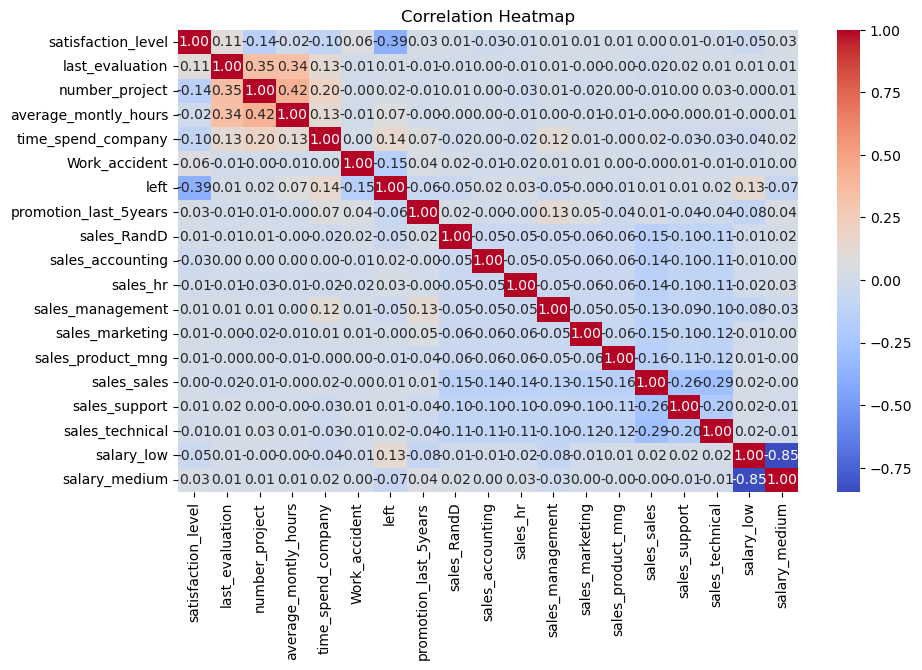

In [14]:
# Step 3: Exploratory Data Analysis (EDA)
## 3.1 Correlation heatmap
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

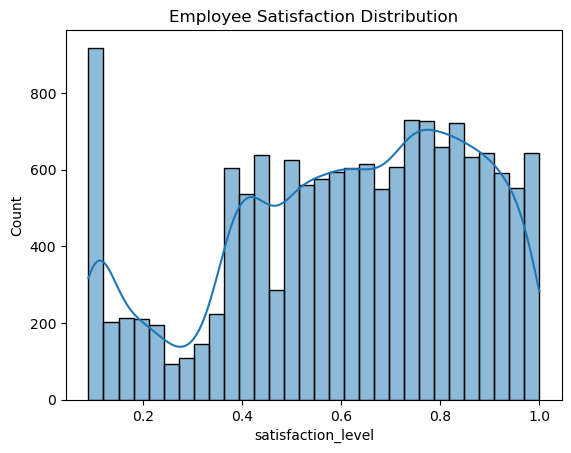

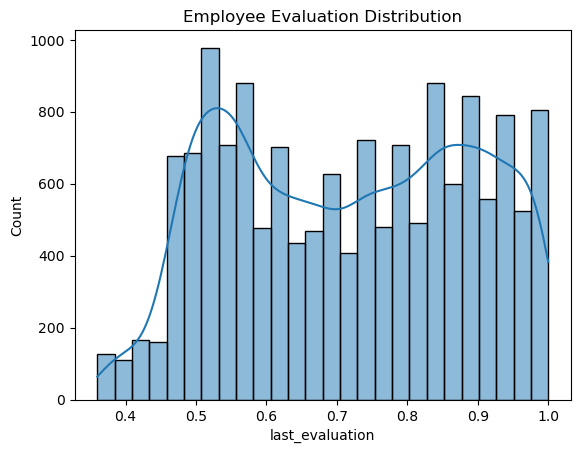

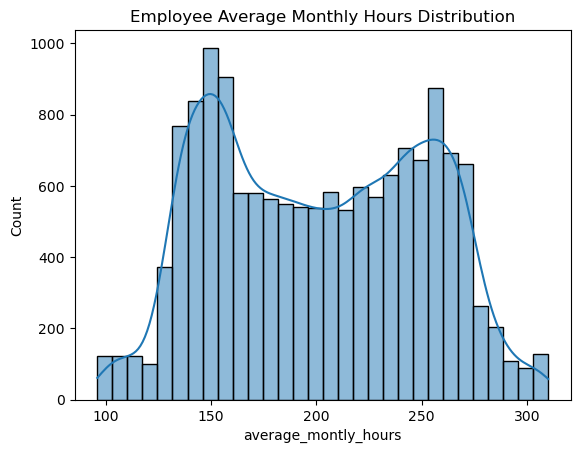

In [6]:
## 3.2 Distribution plots for satisfaction, evaluation, and monthly hours
# Employee Satisfaction
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Employee Satisfaction Distribution')
plt.show()

# Employee Evaluation
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Employee Evaluation Distribution')
plt.show()

# Employee Average Monthly Hours
sns.histplot(df['average_montly_hours'], kde=True)
plt.title('Employee Average Monthly Hours Distribution')
plt.show()

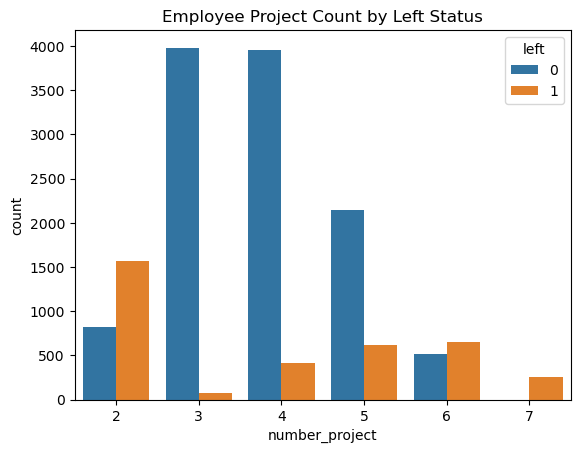

In [7]:
## 3.3 Bar plot of project count by employee status (left or not)
sns.countplot(x='number_project', hue='left', data=df_encoded)
plt.title('Employee Project Count by Left Status')
plt.show()

**Inferences from the Employee Data Analysis:**

1\. **Employee Satisfaction Distribution**:

   - The satisfaction levels are distributed across a range, with peaks possibly indicating common satisfaction thresholds. Lower satisfaction levels may correlate with higher attrition rates.

2\. **Employee Evaluation Distribution**:

   - Evaluations are spread across the spectrum, with concentrations at certain performance levels. Higher evaluations might not necessarily correlate with retention, as other factors like workload and satisfaction play significant roles.

3\. **Average Monthly Hours Distribution**:

   - The distribution of monthly working hours shows variability. Extremely high hours might indicate overwork, which could lead to burnout and higher turnover.

4\. **Correlation Heatmap Insights**:

   - **Satisfaction Level**: Strong negative correlation with attrition (`left`), indicating that lower satisfaction significantly increases the likelihood of employees leaving.

   - **Last Evaluation**: Moderate positive correlation with the number of projects and average monthly hours, suggesting that higher evaluations are associated with more workload.

   - **Number of Projects**: Positively correlated with average monthly hours and time spent at the company, indicating that more projects lead to longer hours and potentially longer tenure.

   - **Time Spent at Company**: Positively correlated with attrition, implying that employees who have been at the company longer are more likely to leave, possibly due to burnout or lack of advancement opportunities.

   - **Work Accident**: Minimal correlation with other factors, suggesting that workplace accidents do not significantly impact satisfaction or attrition.

   - **Promotion Last 5 Years**: Negative correlation with attrition, indicating that recent promotions can help retain employees.

   - **Salary Levels**: Low and medium salary levels show a strong correlation with each other but minimal direct impact on attrition, suggesting that salary alone is not a primary driver of turnover.

**Actionable Insights**:

- **Enhance Satisfaction**: Focus on improving employee satisfaction through better work-life balance, recognition, and career development opportunities.

- **Monitor Workload**: Ensure that high-performing employees are not overburdened with too many projects or excessive hours.

- **Promotion and Growth**: Increase promotion opportunities and career growth paths to retain long-term employees.

- **Targeted Interventions**: Identify and support employees with lower satisfaction and higher workloads to prevent burnout and attrition.

These insights can guide strategies to improve employee retention and overall workplace satisfaction.

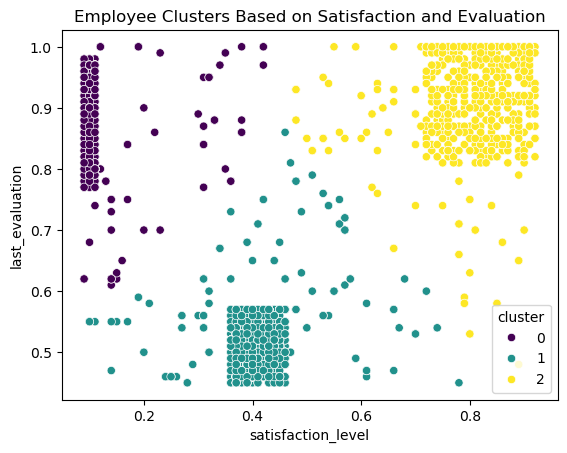

In [8]:
# Step 4: Clustering Employees Who Left Based on Satisfaction and Evaluation
## 4.1 Selecting relevant columns for clustering
df_left = df_encoded[df_encoded['left'] == 1][['satisfaction_level', 'last_evaluation']]

## 4.2 Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=123)
df_left['cluster'] = kmeans.fit_predict(df_left)

# Plot the clusters
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df_left, palette='viridis')
plt.title('Employee Clusters Based on Satisfaction and Evaluation')
plt.show()

# Employee Clusters Analysis

Based on the provided data, employees are clustered into three groups based on their `satisfaction_level` and `last_evaluation` scores. Here’s a detailed analysis of each cluster:

---

## **Cluster 0**
- **Satisfaction Level**: Very low (~0.1)
- **Last Evaluation**: High (~0.8 to 1)
- **Inference**: 
  - These employees are high performers but are extremely dissatisfied.
  - Possible causes: Burnout, lack of recognition, or misalignment with job roles.
  - **Recommendations**:
    - Investigate root causes of dissatisfaction.
    - Improve work-life balance.
    - Provide recognition and align roles with career aspirations.

---

## **Cluster 1**
- **Satisfaction Level**: Medium (~0.4)
- **Last Evaluation**: Low (below ~0.6)
- **Inference**: 
  - These employees have moderate satisfaction but are underperforming.
  - Possible causes: Lack of skills, motivation, or role alignment.
  - **Recommendations**:
    - Provide targeted training and mentorship.
    - Set clear performance expectations.
    - Explore factors contributing to moderate satisfaction to improve engagement.

---

## **Cluster 2**
- **Satisfaction Level**: High (above ~0.7)
- **Last Evaluation**: High (above ~0.8)
- **Inference**: 
  - These employees are highly satisfied and high performers.
  - They are likely key contributors to the organization.
  - **Recommendations**:
    - Focus on retention strategies.
    - Provide recognition and career growth opportunities.
    - Maintain a supportive work environment to sustain their performance and satisfaction.

---

## **Conclusion**
Understanding these clusters helps tailor HR strategies to address specific employee needs, improve performance, and enhance overall job satisfaction.

In [9]:
# Step 5: Handle Class Imbalance using SMOTE
## 5.1 Pre-process the data
categorical_cols = df_encoded.select_dtypes(include='object').columns
numeric_cols = df_encoded.select_dtypes(exclude='object').columns

# Apply get_dummies to categorical variables
df_processed = df_encoded.drop('left', axis=1)  # Remove the target column 'left' temporarily

# Stratified split of the data (80:20)
X = df_processed
y = df_encoded['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# Upsample using SMOTE
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [10]:
# Step 6: Model Training and Evaluation (using 5-fold Cross-validation)
## 6.1 Logistic Regression with 5-Fold Cross-validation
log_reg = LogisticRegression(random_state=123)
cross_val_score(log_reg, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Fit and generate classification report
log_reg.fit(X_train_smote, y_train_smote)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      2286
           1       0.50      0.75      0.60       714

    accuracy                           0.76      3000
   macro avg       0.70      0.76      0.72      3000
weighted avg       0.81      0.76      0.78      3000



/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/saturncloud/envs/saturn/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

In [11]:
## 6.2 Random Forest Classifier with 5-Fold Cross-validation
rf_clf = RandomForestClassifier(random_state=123)
cross_val_score(rf_clf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Fit and generate classification report
rf_clf.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [12]:
## 6.3 Gradient Boosting Classifier with 5-Fold Cross-validation
gb_clf = GradientBoostingClassifier(random_state=123)
cross_val_score(gb_clf, X_train_smote, y_train_smote, cv=5, scoring='accuracy')

# Fit and generate classification report
gb_clf.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.93      0.92       714

    accuracy                           0.96      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.96      0.96      0.96      3000



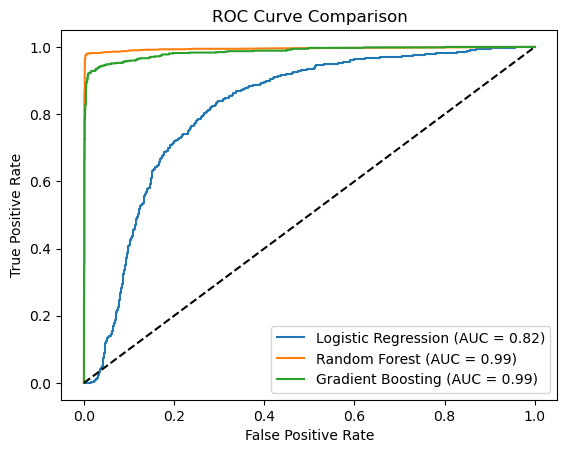

In [13]:
# Step 7: ROC Curve and AUC Comparison
## 7.1 Calculate ROC-AUC for each model
roc_auc_log_reg = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
roc_auc_gb = roc_auc_score(y_test, gb_clf.predict_proba(X_test)[:, 1])

# Plot ROC curves
fpr, tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_log_reg))

fpr, tpr, _ = roc_curve(y_test, rf_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))

fpr, tpr, _ = roc_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Gradient Boosting (AUC = {:.2f})'.format(roc_auc_gb))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

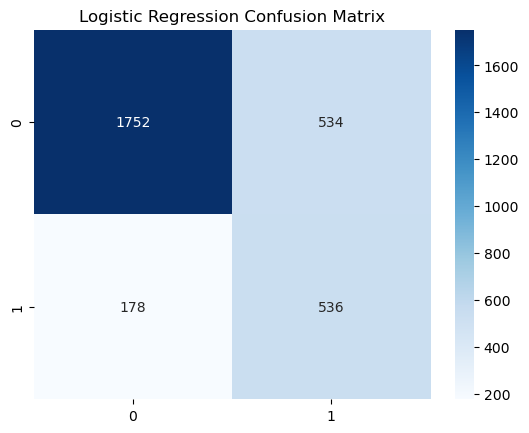

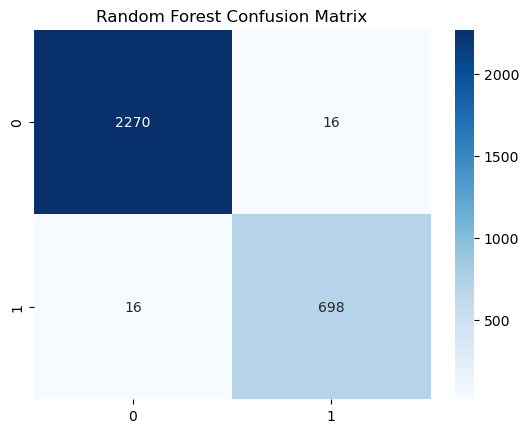

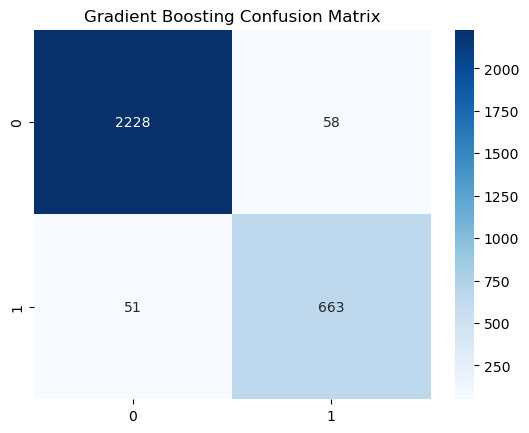

In [14]:
## 7.2 Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Plot confusion matrices
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

## 7.3 Explain which metric needs to be used from the confusion matrix: Recall or Precision?

When deciding between **recall** and **precision** from the confusion matrix, the choice depends on the business context and the cost of false positives versus false negatives. Here's a breakdown:

#### 1. **Recall (Sensitivity or True Positive Rate)**

Recall is the percentage of actual positives (e.g., employees who left) correctly identified by the model. It is calculated as:

Recall = True Positives / (True Positives + False Negatives)

**When to prioritize recall:**
- **High-risk scenario**: If your goal is to identify **all potential employees who might leave**, even at the cost of also identifying some employees who will stay, recall should be prioritized.
- **Business Context**: In a company’s retention strategy, identifying employees at risk of leaving (i.e., **false negatives** are costly) may be more important than wrongly flagging an employee who won’t leave (i.e., **false positives**).
  
In this case, you don’t want to miss any employees who might leave, so you want a **high recall** to capture as many of them as possible, even if it means flagging some who are not likely to leave.

#### 2. **Precision (Positive Predictive Value)**

Precision is the percentage of predicted positives (e.g., employees predicted to leave) that are actually correct. It is calculated as:

Precision = True Positives / (True Positives + False Positives)

**When to prioritize precision:**
- **Low-risk scenario**: If you are more concerned about only flagging employees who are truly at risk of leaving and avoid flagging too many false positives, precision should be the focus.
- **Business Context**: If the company has limited resources to intervene and doesn’t want to overinvest in retention activities for employees who aren’t actually leaving, **precision** would be more important. You want to minimize the number of false positives (employees who are flagged but won't leave).

#### 3. **Balanced Approach (F1-Score)**

Sometimes a balance between precision and recall is necessary. You can use the **F1-score** to evaluate the trade-off:

F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

#### Conclusion:

- **If the focus is on identifying all employees at risk of leaving (minimizing false negatives), prioritize recall**.
- **If the focus is on ensuring that only employees who are truly at risk are flagged (minimizing false positives), prioritize precision**.

In many employee retention contexts, **recall** is often prioritized because it is more important not to miss potential leavers, even if that means flagging some who may not actually leave.

Recall: When predicting employee turnover, we need to minimize false negatives (employees who are at risk but are classified as safe). Hence, recall is crucial in this case


In [31]:
import numpy as np
import pandas as pd

# Assume the best model (Gradient Boosting Classifier) has already been trained as `gb_clf`

# Predict probabilities of employee turnover
y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]

# Categorize employees into four zones based on their probability score
def categorize_zone(probability):
    if probability < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= probability < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= probability < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

# Apply categorization to the predicted probabilities
employee_zones = [categorize_zone(prob) for prob in y_pred_proba]

# Add this to a DataFrame for further analysis
employee_zone_df = pd.DataFrame({
    'Employee_ID': X_test.index,  # Assuming you have an index or identifier for each employee
    'Predicted_Probability': y_pred_proba,
    'Risk_Zone': employee_zones
})

# Display the first few rows of the categorized zones
print(employee_zone_df.head())

# 7.2. Suggest Retention Strategies for Each Zone
retention_strategies = {
    'Safe Zone (Green)': 'Focus on maintaining high satisfaction, continue offering career development programs, and keep communication open.',
    'Low-Risk Zone (Yellow)': 'Provide incentives to further engage employees, conduct satisfaction surveys, and ensure a good work-life balance.',
    'Medium-Risk Zone (Orange)': 'Focus on addressing concerns such as workload or career progression. Offer personalized retention programs.',
    'High-Risk Zone (Red)': 'Immediate attention needed. Consider one-on-one meetings, surveys, and explore any issues that may lead to resignation. Provide targeted interventions like job rotation or extra support.'
}

# Suggest strategies for each employee based on their risk zone
employee_zone_df['Retention_Strategy'] = employee_zone_df['Risk_Zone'].apply(lambda x: retention_strategies[x])

# Display the results with suggested strategies
print(employee_zone_df[['Employee_ID', 'Risk_Zone', 'Retention_Strategy']].head())


   Employee_ID  Predicted_Probability             Risk_Zone
0        10627               0.005789     Safe Zone (Green)
1         2703               0.949990  High-Risk Zone (Red)
2         6059               0.089758     Safe Zone (Green)
3         3258               0.017143     Safe Zone (Green)
4         4565               0.025755     Safe Zone (Green)
   Employee_ID             Risk_Zone  \
0        10627     Safe Zone (Green)   
1         2703  High-Risk Zone (Red)   
2         6059     Safe Zone (Green)   
3         3258     Safe Zone (Green)   
4         4565     Safe Zone (Green)   

                                  Retention_Strategy  
0  Focus on maintaining high satisfaction, contin...  
1  Immediate attention needed. Consider one-on-on...  
2  Focus on maintaining high satisfaction, contin...  
3  Focus on maintaining high satisfaction, contin...  
4  Focus on maintaining high satisfaction, contin...  
